Bayesian Network (Customer Purchase Prediction)

In [1]:
# Step 1: Install pgmpy
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 50.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

Load dataset

In [4]:

data = pd.read_csv('Social_Network_Ads.csv')
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


### Pre-processing
- The data was manually checked and no missing values were found.
- The data was manually checked and no duplicates were found. The user id does not repeat.
- Convert all continous attributes to discrete attributes and the package pomegranate only supports discrete values.

<Axes: >

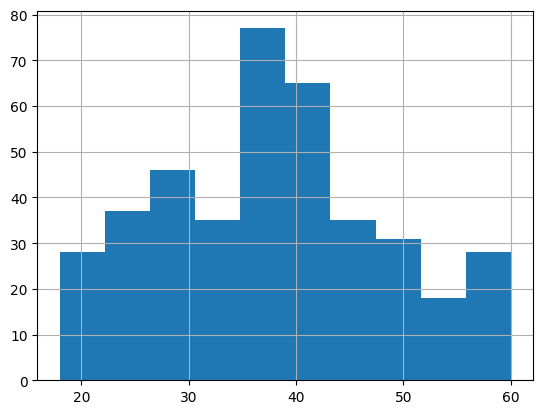

In [5]:
data.Age.hist()

<Axes: >

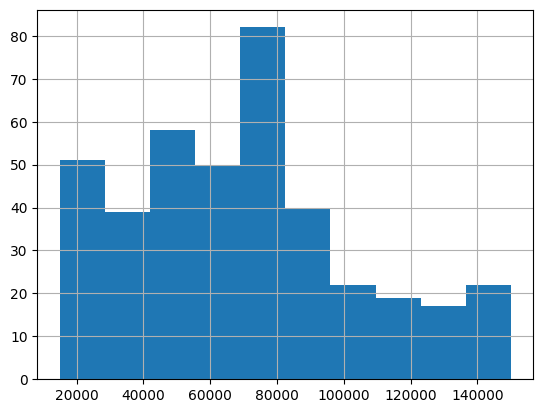

In [6]:
data.EstimatedSalary.hist()

Categorize Age and Salary into bins

In [7]:
def categorize_age(age):
    if age <= 30:
        return 'group 1'
    elif age <= 45:
        return 'group 2'
    else:
        return 'group 3'

def categorize_salary(salary):
    if salary <= 40000:
        return 'low'
    elif salary <= 80000:
        return 'medium'
    else:
        return 'high'

data['Age'] = data['Age'].apply(categorize_age)
data['EstimatedSalary'] = data['EstimatedSalary'].apply(categorize_salary)
data['Purchased'] = data['Purchased'].astype(str)  # ensure string for categorical

print("\nTransformed sample data:")
print(data.head())


Transformed sample data:
    User ID  Gender      Age EstimatedSalary Purchased
0  15624510    Male  group 1             low         0
1  15810944    Male  group 2             low         0
2  15668575  Female  group 1          medium         0
3  15603246  Female  group 1          medium         0
4  15804002    Male  group 1          medium         0


Define Bayesian Network structure

In [8]:
model = DiscreteBayesianNetwork([
    ('Gender', 'Purchased'),
    ('Age', 'Purchased'),
    ('EstimatedSalary', 'Purchased')
])

Fit model using Maximum Likelihood Estimation

In [13]:
model.fit(data, estimator=MaximumLikelihoodEstimator)


Inference engine

In [14]:
inference = VariableElimination(model)

Example Prediction 1

In [15]:
evidence_1 = {'Gender': 'Female', 'Age': categorize_age(33), 'EstimatedSalary': categorize_salary(33000)}
query_1 = inference.map_query(variables=['Purchased'], evidence=evidence_1)
print("\nPrediction 1:")
print(f"Evidence: {evidence_1}")
print(f"Predicted Purchase: {query_1['Purchased']}")

0it [00:00, ?it/s]

0it [00:00, ?it/s]


Prediction 1:
Evidence: {'Gender': 'Female', 'Age': 'group 2', 'EstimatedSalary': 'low'}
Predicted Purchase: 0


Example Prediction 2 (with probability)

In [16]:
evidence_2 = {'Gender': 'Male', 'Age': categorize_age(32), 'EstimatedSalary': categorize_salary(115000)}
query_2 = inference.query(variables=['Purchased'], evidence=evidence_2)
print("\nPrediction 2 (Probability Distribution):")
print(f"Evidence: {evidence_2}")
print(query_2)


Prediction 2 (Probability Distribution):
Evidence: {'Gender': 'Male', 'Age': 'group 2', 'EstimatedSalary': 'high'}
+--------------+------------------+
| Purchased    |   phi(Purchased) |
+==============+==================+
| Purchased(0) |           0.1429 |
+--------------+------------------+
| Purchased(1) |           0.8571 |
+--------------+------------------+


Example Prediction 3

In [17]:

evidence_3 = {'Gender': 'Male', 'Age': categorize_age(50), 'EstimatedSalary': categorize_salary(10000)}
query_3 = inference.query(variables=['Purchased'], evidence=evidence_3)
print("\nPrediction 3 (Probability Distribution):")
print(f"Evidence: {evidence_3}")
print(query_3)



Prediction 3 (Probability Distribution):
Evidence: {'Gender': 'Male', 'Age': 'group 3', 'EstimatedSalary': 'low'}
+--------------+------------------+
| Purchased    |   phi(Purchased) |
+==============+==================+
| Purchased(0) |           0.0000 |
+--------------+------------------+
| Purchased(1) |           1.0000 |
+--------------+------------------+
